In [ ]:
#gradiente decendente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp, log
df=pd.read_csv("datos_blanton.csv",names=['M','Phi_error_inferior','Phi','Phi_error_superior'])

In [2]:
M=df['M']
phi=df['Phi']
df['Er_inf']=df['Phi']-df['Phi_error_inferior']
df['Er_sup']=df['Phi_error_superior'] -df['Phi']

In [3]:
error_i=['Er_inf']
error_s=['Er_sup']
error_i= df['Er_inf'].to_numpy()
error_s= df['Er_sup'].to_numpy()

In [4]:
s=(error_i + error_s)/2

In [5]:
def func(M,M1,phi1,a):
    y=[]
    for i in M:
        y1=0.4*log(10)*phi1*(10**(-0.4*(i-M1)*(a+1)))*exp(-10**(-0.4*(i-M1)))
        y.append(y1)

    return(y)

In [6]:
def chi2(M,phi,M1,phi1,a,s):
    z=func(M,M1,phi1,a)
    x=((phi - z)/s)**2
    x2=np.sum(x)

    return(x2)

In [7]:
chi2(M,phi,-20.83,0.0146,-1.20,s)

29.71858394183985

In [8]:
def dphi(M,M1,phi1,a):
    dphi=[]
    for i in M:
        dp=0.4*log(10)*(10**(-0.4*(i-M1)*(a+1)))*exp(-10**(-0.4*(i-M1)))
        dphi.append(dp)

    return(dphi)


In [9]:
def da(M,M1,phi1,a):
    da=[]
    for i in M:
        dalp=0.4*log(10)*phi1*exp(-10**(-0.4*(i-M1)))* log(10) * (10**(-0.4*(i-M1)*(a+1))) * (-0.4) * (i-M1)
        da.append(dalp)

    return(da)

In [10]:
def dm(M,M1,phi1,a):
    dm=[]
    for i in M:
        dm1=0.4*log(10)*phi1*exp(-10**(-0.4*(i-M1)))* log(10) * (10**(-0.4*(i-M1)*(a+1))) * (-0.4)*(a+1) + 0.4*log(10)*phi1* (10**(-0.4*(i-M1)*(a+1)))*exp(-10**(-0.4*(i-M1)))*log(10)*10**(-0.4*(i-M1))*(-0.4)
        dm.append(dm1)

    return(dm)

In [11]:
def gradiente(M,phi,M1,phi1,a,s):

    z=func(M,M1,phi1,a)
    dphi1=(-2*(phi - z)/s**2)*dphi(M,M1,phi1,a)
    dfi=np.sum(dphi1)

    dm_=(-2*(phi - z)/s**2)*dm(M,M1,phi1,a)
    dm1=np.sum(dm_)

    da_=(-2*(phi - z)/s**2)*da(M,M1,phi1,a)
    da1=np.sum(da_)

    norma = np.sqrt(dfi**2 + da1**2 + dm1**2)

    ver_grad = np.zeros(3)
    ver_grad[0], ver_grad[1], ver_grad[2] = (dfi/norma), (da1/norma),(dm1/norma)

    return(ver_grad)


In [12]:
gradiente(M,phi,-20.83,0.0146,-1.20,s)

array([ 0.99976307, -0.00319843, -0.02153063])

In [22]:
#gradiente decendente
philim = [0.00146,0.146]
alim = [-2.20,-0.20]
Mlim = [-21.83,-19.83]

eta=0.01

eta1=eta*(philim[1]-philim[0])
eta2=eta*(alim[1]-alim[0])
eta3=eta*(Mlim[1]-Mlim[0])

grad=np.array([0,0,0])


while np.any((abs(grad))<1.E-10):
  phi1=np.random.uniform(philim[0],philim[1])
  M1=np.random.uniform(Mlim[0],Mlim[1])
  a=np.random.uniform(alim[0],alim[1])
  grad=gradiente(M,phi,M1,phi1,a,s)

a_l=[a]
m_l=[M1]
phi_l=[phi1]
N=1000

for i in range(N):
  phi_new= phi_l[i] - eta1*gradiente(M,phi,m_l[i],phi_l[i],a_l[i],s)[0]
  phi_l.append(phi_new)

  a_new= a_l[i] - eta2*gradiente(M,phi,m_l[i],phi_l[i],a_l[i],s)[1]
  a_l.append(a_new)

  m_new= m_l[i] - eta3*gradiente(M,phi,m_l[i],phi_l[i],a_l[i],s)[2]
  m_l.append(m_new)



In [23]:
phi_fin=phi_l[N-1]
a_fin=a_l[N-1]
m_fin=m_l[N-1]
print(phi_fin,a_fin,m_fin)

0.015638729052932142 -1.1522353541303443 -20.743797569568397


In [24]:
phi_b=0.0146
a_b=-1.20
m_b=-20.83

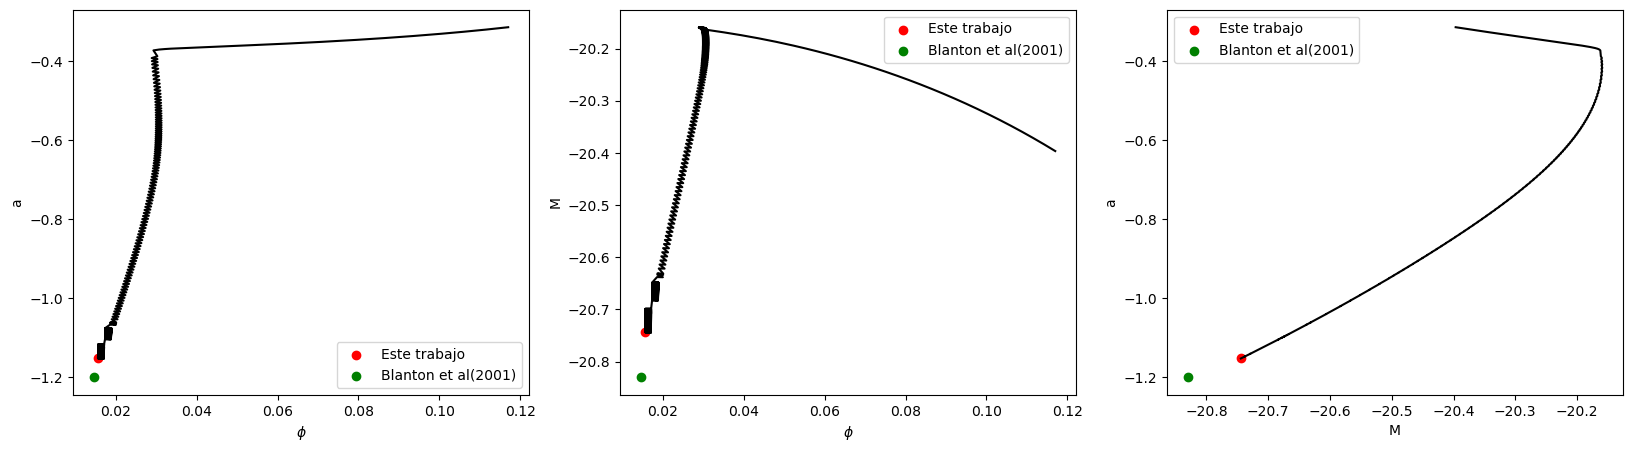

In [25]:
plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
plt.plot(phi_l,a_l,color='black')
plt.scatter(phi_fin,a_fin,color='red',label='Este trabajo')
plt.scatter(phi_b,a_b,color='green',label='Blanton et al(2001)')
plt.xlabel('$\phi$')
plt.ylabel('a')
plt.legend()



plt.subplot(1,3,2)
plt.plot(phi_l,m_l,color='black')
plt.scatter(phi_fin,m_fin,color='red',label='Este trabajo')
plt.scatter(phi_b,m_b,color='green',label='Blanton et al(2001)')
plt.xlabel('$\phi$')
plt.ylabel('M')
plt.legend()



plt.subplot(1,3,3)
plt.plot(m_l,a_l,color='black')
plt.scatter(m_fin,a_fin,color='red',label='Este trabajo')
plt.scatter(m_b,a_b,color='green',label='Blanton et al(2001)')
plt.xlabel('M')
plt.ylabel('a')
plt.legend()


plt.show()

In [26]:
n=100
_X=np.linspace(0.001,0.15,n) #Phi
_W=np.linspace(-0.2,-2.20,n) #ALPHA
_Y=np.linspace(-19,-21.83,n) #M

#ahora defino las matrices donde voy a guardar los valores del chi2

_Z1=np.zeros((n,n))
_Z2=np.zeros((n,n))
_Z3=np.zeros((n,n))

for ix,phi1 in enumerate(_X):
  for iy,M1 in enumerate(_Y):
    _Z1[iy,ix]=chi2(M,phi,M1,phi1,-1.2,s)  #recorro los valores en _x(phi) y _y(M) dejando alpha constante y calculo el chi2, guardo los valores en la matriz _Z1

for ix,phi1 in enumerate(_X):
  for iw,a in enumerate(_W):
    _Z2[iw,ix]=chi2(M,phi,-20.83,phi1,a,s)

for iy,M1 in enumerate(_Y):
  for iw,a in enumerate(_W):
    _Z3[iw,iy]=chi2(M,phi,M1,0.00146,a,s)


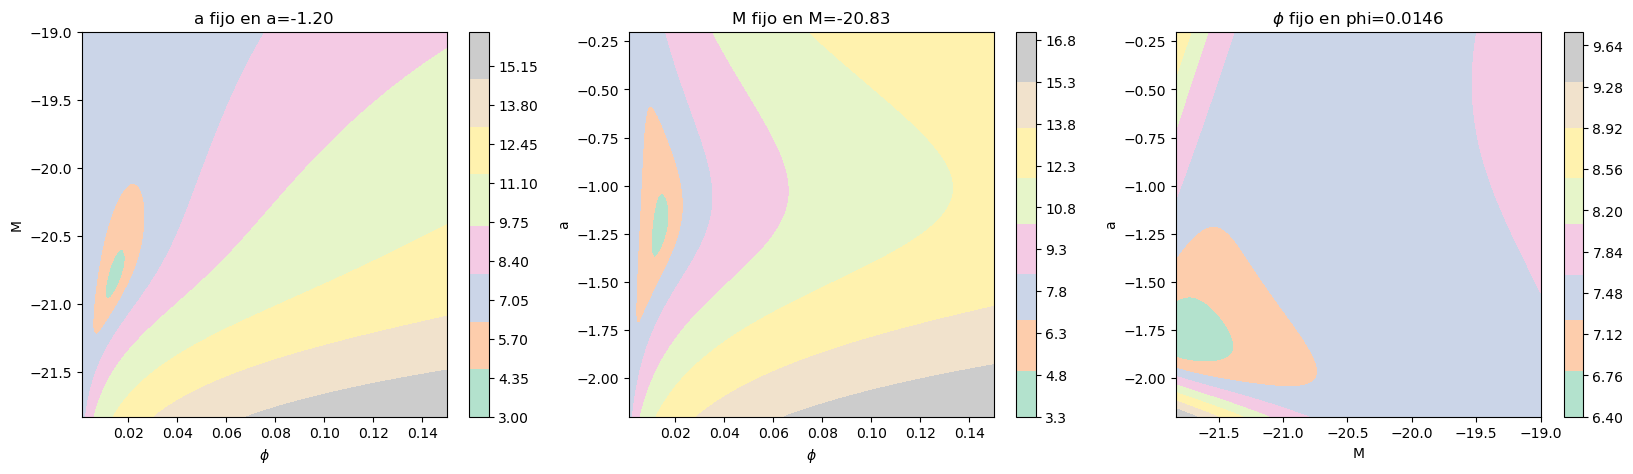

In [27]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.contourf(_X, _Y, np.log(_Z1),100,cmap='Pastel2')
plt.colorbar()
plt.xlabel('$\phi$')
plt.ylabel('M')
plt.title('a fijo en a=-1.20')

plt.subplot(1,3,2)
plt.contourf(_X, _W, np.log(_Z2),100,cmap='Pastel2')
plt.colorbar()
plt.xlabel('$\phi$')
plt.ylabel('a')
plt.title('M fijo en M=-20.83')

plt.subplot(1,3,3)
plt.contourf(_Y, _W, np.log(_Z3),100,cmap='Pastel2')
plt.colorbar()
plt.xlabel('M')
plt.ylabel('a')
plt.title('$\phi$ fijo en phi=0.0146')


plt.show()

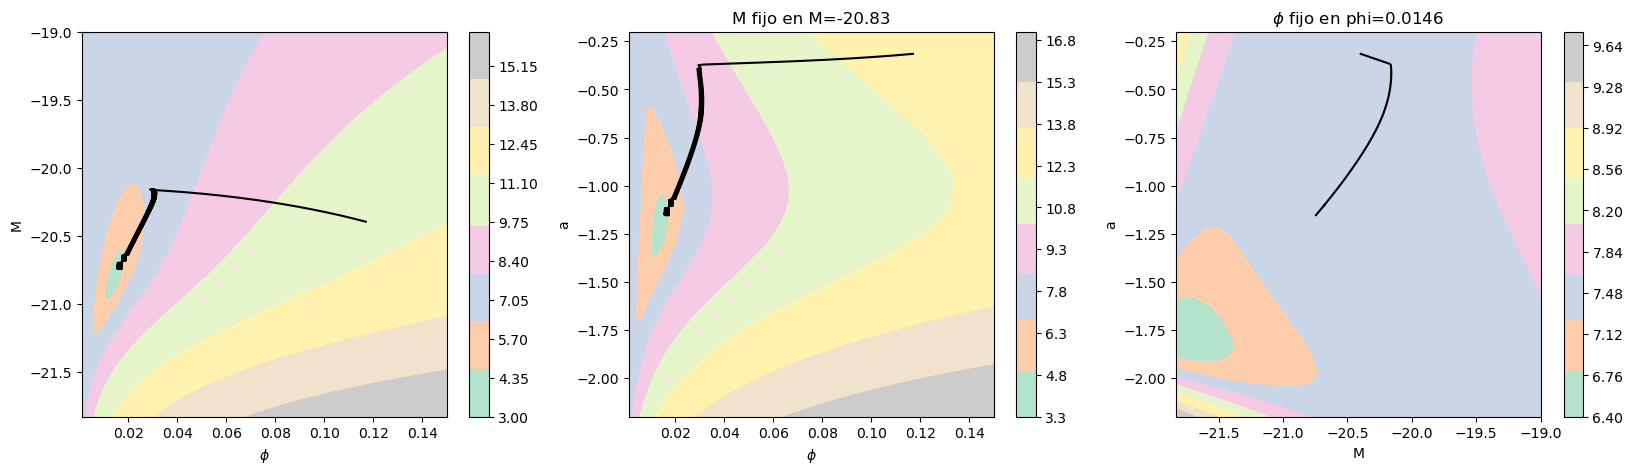

In [28]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(phi_l,m_l,color='black')
plt.contourf(_X, _Y, np.log(_Z1),100,cmap='Pastel2')
plt.colorbar()
plt.xlabel('$\phi$')
plt.ylabel('M')


plt.subplot(1,3,2)
plt.plot(phi_l,a_l,color='black')
plt.contourf(_X, _W, np.log(_Z2),100,cmap='Pastel2')
plt.colorbar()
plt.xlabel('$\phi$')
plt.ylabel('a')
plt.title('M fijo en M=-20.83')


plt.subplot(1,3,3)
plt.plot(m_l,a_l,color='black')
plt.contourf(_Y, _W, np.log(_Z3),100,cmap='Pastel2')
plt.colorbar()
plt.xlabel('M')
plt.ylabel('a')
plt.title('$\phi$ fijo en phi=0.0146')

plt.show()

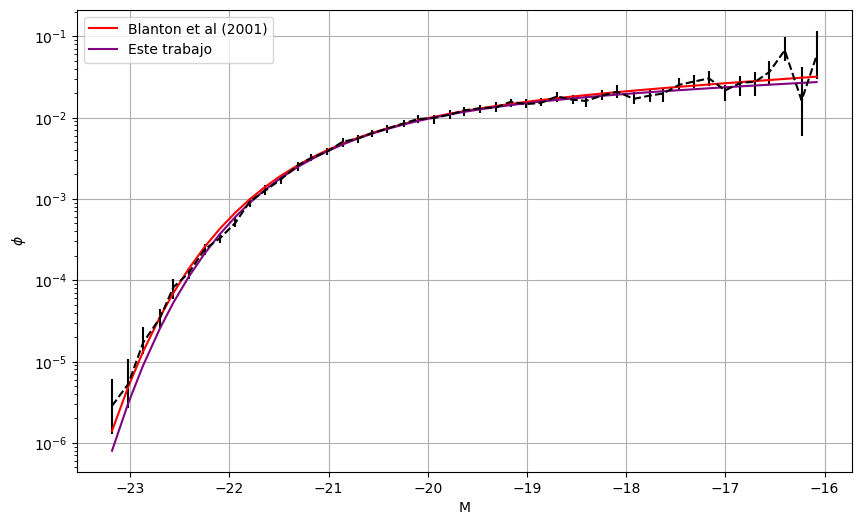

In [29]:
z=func(M,-20.83,0.0146,-1.20)
w=func(M,m_fin,phi_fin,a_fin)
plt.figure(figsize=(10,6))
plt.errorbar(M,phi,linestyle='--',color='black',yerr =[error_i,error_s],ecolor='black')
plt.plot(M,z,color='red',label='Blanton et al (2001)')
plt.plot(M,w,color='purple',label='Este trabajo')
plt.xlabel('M')
plt.ylabel('$\phi$')
plt.yscale('log')
plt.legend()
plt.grid(True)

plt.show()